In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
import os
import numpy as np
import torch.optim as optim
from tqdm import tqdm 
import seaborn as sns
import albumentations as A
from sklearn.metrics import confusion_matrix

In [2]:
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [18]:
# Define the path to your dataset folder
dataset_path = './dataset/'

# Define the transformations (you can modify these based on your needs)
transform = transforms.Compose([
    transforms.Resize((144, 144)),  # Resize images for faster processing
    transforms.ToTensor(),          # Convert images to tensor format
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])


In [ ]:
Atransform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [5]:
# Load the dataset using ImageFolder
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split the dataset into train and test sets (80% train, 20% test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoader for batching and shuffling
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [8]:

# Function to display images
def imshow(img, title=None):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
    plt.title("Fake Image" if title == 0 else "Real Image")
    plt.axis('off')

In [5]:
random_images, random_labels = next(iter(DataLoader(train_dataset, batch_size=32, shuffle=True)))


In [10]:
random_images.shape, random_labels

(torch.Size([32, 3, 144, 144]),
 tensor([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
         1, 1, 1, 0, 0, 1, 1, 1]))

In [ ]:

# Visualize examples of 'real' and 'fake' images
for i in range(32):
    plt.figure(figsize=(5, 5))
    imshow(random_images[i], title=random_labels[i])
    plt.show()


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=7, stride=1, padding=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=4, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=3)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=3)
        self.fc1 = nn.Linear(32 * 7 * 7, 150)
        self.fc2 = nn.Linear(150, num_classes)
        
        # Adding Dropout layer after fully connected layers
        # self.dropout = nn.Dropout(0.5)  # 50% dropout

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x


# Instantiate the model for binary classification (1 output unit)
model = CustomCNN(num_classes=1)

# Print model architecture
print(model)


CustomCNN(
  (conv1): Conv2d(3, 6, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=150, bias=True)
  (fc2): Linear(in_features=150, out_features=1, bias=True)
)


In [ ]:
# Set up the criterion (loss function) and optimizer
# Loss function for binary classification
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training the model
num_epochs = 5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
# Set up the criterion (loss function) and optimizer
# Loss function for binary classification
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training the model
num_epochs = 5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


CustomCNN(
  (conv1): Conv2d(3, 6, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=150, bias=True)
  (fc2): Linear(in_features=150, out_features=1, bias=True)
)

In [ ]:
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    # Wrap the train_loader with tqdm for the training loop progress bar
    with tqdm(train_loader, unit="batch", desc=f"Epoch {epoch+1}/{num_epochs} (Train)") as tepoch:
        for inputs, labels in tepoch:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the gradients

            # Forward pass
            outputs = model(inputs)  # Logits: (batch_size, 1) for binary classification

            # Calculate the loss (using BCEWithLogitsLoss for binary classification)
            loss = criterion(outputs.squeeze(), labels.float())

            # Backpropagation
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
            # Calculate the number of correct predictions
            predicted = (outputs > 0.5).float()  # Apply threshold of 0.5 to get binary predictions (0 or 1)
            correct_preds += (predicted.squeeze() == labels).sum().item()  # Compare predictions with true labels
            total_preds += labels.size(0)

            # Update the tqdm progress bar description with loss and accuracy
            tepoch.set_postfix(loss=running_loss / len(tepoch), accuracy=100 * correct_preds / total_preds)
    
    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct_preds / total_preds

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

Epoch 1/5 (Train): 100%|██████████| 102/102 [00:29<00:00,  3.51batch/s, accuracy=53.6, loss=0.691]


Epoch 1/5 - Loss: 0.6909, Accuracy: 53.55%


Epoch 2/5 (Train): 100%|██████████| 102/102 [00:27<00:00,  3.68batch/s, accuracy=53.6, loss=0.691]


Epoch 2/5 - Loss: 0.6909, Accuracy: 53.55%


Epoch 3/5 (Train):  16%|█▌        | 16/102 [00:04<00:23,  3.59batch/s, accuracy=52.7, loss=0.108] 

In [7]:
model.eval()

# Initialize variables to track the number of correct predictions and total number of samples
correct = 0
total = 0
test_loss = 0.0

# Use torch.no_grad() to disable gradient computation (saves memory during inference)
with torch.no_grad():
    for inputs, labels in test_loader:  # Iterate over batches in the test set
        # Forward pass
        outputs = model(inputs)  # Get predictions
        
        # Calculate the loss
        loss = criterion(outputs.squeeze(), labels.float())
        test_loss += loss.item()

        # Get predicted labels: if output > 0.5, class 1 (positive), else class 0 (negative)
        predicted = (outputs > 0.5).float()  # Convert logits to binary labels
        
        # Count the number of correct predictions
        correct += (predicted.squeeze() == labels).sum().item()
        total += labels.size(0)  # Add the batch size to the total count

# Calculate average loss and accuracy
average_loss = test_loss / len(test_loader)
accuracy = correct / total

# Print the results
print(f'Test Loss: {average_loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Loss: 0.6987
Test Accuracy: 48.17%


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Collect all predictions and labels
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()  # Apply threshold
        all_preds.extend(predicted.squeeze().cpu().numpy())
        all_labels.extend(labels.float().cpu().numpy())

# Calculate precision, recall, and F1 score
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Precision: 0.4817
Recall: 1.0000
F1 Score: 0.6502


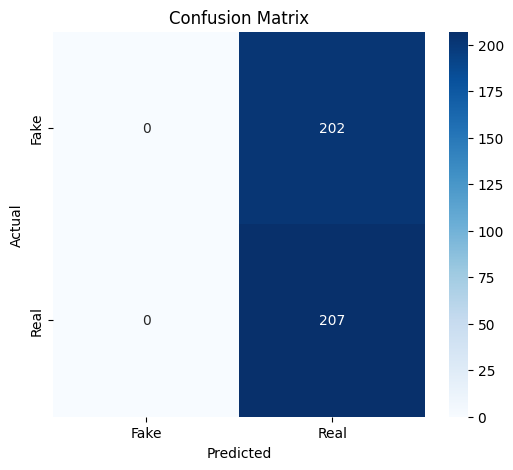

In [26]:
# Compute confusion matrix using sklearn's confusion_matrix function
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix using seaborn's heatmap for better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets
from tqdm import tqdm
import numpy as np

class ImprovedCNN(nn.Module):
    def __init__(self, num_classes=1):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        
        # Calculate the size after convolutions and pooling
        self.fc_input_size = 128 * (144//(2**3)) * (144//(2**3))
        
        self.fc1 = nn.Linear(self.fc_input_size, 512)
        self.fc2 = nn.Linear(512, num_classes)
        
    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        
        x = x.view(-1, self.fc_input_size)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    best_val_acc = 0.0
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0
        
        with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} (Train)') as tepoch:
            for inputs, labels in tepoch:
                inputs, labels = inputs.to(device), labels.to(device)
                
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), labels.float())
                
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
                predicted = (torch.sigmoid(outputs) > 0.5).float()
                correct_preds += (predicted.squeeze() == labels).sum().item()
                total_preds += labels.size(0)
                
                tepoch.set_postfix(
                    loss=running_loss/len(tepoch),
                    accuracy=100*correct_preds/total_preds
                )
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        class_correct = {0: 0, 1: 0}
        class_total = {0: 0, 1: 0}
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), labels.float())
                
                val_loss += loss.item()
                predicted = (torch.sigmoid(outputs) > 0.5).float()
                val_correct += (predicted.squeeze() == labels).sum().item()
                val_total += labels.size(0)
                
                # Per-class accuracy
                for i in range(len(labels)):
                    label = labels[i].item()
                    pred = predicted[i].item()
                    class_total[label] += 1
                    if label == pred:
                        class_correct[label] += 1
        
        val_acc = 100 * val_correct / val_total
        print(f'\nValidation Loss: {val_loss/len(val_loader):.4f}, Accuracy: {val_acc:.2f}%')
        print('Per-class accuracy:')
        for class_idx in [0, 1]:
            if class_total[class_idx] > 0:
                class_acc = 100 * class_correct[class_idx] / class_total[class_idx]
                print(f'Class {class_idx}: {class_acc:.2f}%')
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_model.pth')

# Training setup
transform = transforms.Compose([
    transforms.Resize((144, 144)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet stats
])

# Load and split dataset
dataset = datasets.ImageFolder(root='./dataset/', transform=transform)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(
    dataset, [train_size, val_size, test_size]
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model initialization
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ImprovedCNN().to(device)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([2.0]).to(device))  # Adjust pos_weight based on class imbalance
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=3, verbose=True)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20, device=device)

c:\Users\TANISHQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Epoch 1/20 (Train): 100%|██████████| 45/45 [00:46<00:00,  1.03s/it, accuracy=53.3, loss=3.63]



Validation Loss: 0.9305, Accuracy: 55.23%
Per-class accuracy:
Class 0: 2.14%
Class 1: 100.00%


Epoch 2/20 (Train): 100%|██████████| 45/45 [00:46<00:00,  1.02s/it, accuracy=55.3, loss=0.923]



Validation Loss: 0.9097, Accuracy: 54.58%
Per-class accuracy:
Class 0: 0.71%
Class 1: 100.00%


Epoch 3/20 (Train): 100%|██████████| 45/45 [00:48<00:00,  1.07s/it, accuracy=55.2, loss=0.904]



Validation Loss: 0.9140, Accuracy: 57.19%
Per-class accuracy:
Class 0: 15.71%
Class 1: 92.17%


Epoch 4/20 (Train): 100%|██████████| 45/45 [00:47<00:00,  1.07s/it, accuracy=57.6, loss=0.874]



Validation Loss: 0.9142, Accuracy: 55.88%
Per-class accuracy:
Class 0: 14.29%
Class 1: 90.96%


Epoch 5/20 (Train):  27%|██▋       | 12/45 [00:11<00:32,  1.02it/s, accuracy=61.7, loss=0.225]

Extracting features from pretrained CNN models and classifying it with SVM 

In [ ]:
from torchvision import models
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Load pre-trained VGG16 model without the top classification layer
vgg16 = models.vgg16(pretrained=True)


c:\Users\TANISHQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\TANISHQ\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\TANISHQ/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [10:26<00:00, 883kB/s]   


NameError: name 'nn' is not defined

In [3]:
vgg16.classifier = nn.Sequential()  # Remove the classifier (fully connected layers)

# Set the model to evaluation mode (we only need feature extraction)
vgg16.eval()

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg16.to(device)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
def extract_features(dataloader):
    features = []
    labels = []
    
    with torch.no_grad():  # No need to compute gradients for feature extraction
        for inputs, targets in dataloader:
            inputs = inputs.to(device)
            targets = targets.numpy()
            
            # Extract features from the VGG16 model
            feature = vgg16(inputs)
            features.append(feature.cpu().numpy())  # Convert to numpy and move back to CPU
            labels.append(targets)
    
    # Convert to numpy arrays
    features = np.concatenate(features, axis=0)
    labels = np.concatenate(labels, axis=0)
    
    return features, labels

# Extract features from the training and test sets
train_features, train_labels = extract_features(train_loader)
test_features, test_labels = extract_features(test_loader)

print(f"Extracted features from train set: {train_features.shape}")
print(f"Extracted features from test set: {test_features.shape}")


Extracted features from train set: (1632, 25088)
Extracted features from test set: (409, 25088)


In [8]:
# Apply PCA to reduce dimensionality to 50 components
pca = PCA(n_components=50)
train_features_pca = pca.fit_transform(train_features)
test_features_pca = pca.transform(test_features)

print(f"Train features after PCA: {train_features_pca.shape}")
print(f"Test features after PCA: {test_features_pca.shape}")


Train features after PCA: (1632, 50)
Test features after PCA: (409, 50)


In [9]:
# Create an SVM classifier with a linear kernel
svm = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm.fit(train_features_pca, train_labels)


SVC(kernel='linear', random_state=42)

In [13]:
# Make predictions on the test set
test_predictions = svm.predict(test_features_pca)

# Evaluate performance
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(test_labels, test_predictions))

# Optionally, visualize a few predictions
# sample_idx = np.random.choice(len(test_labels), size=5, replace=False)
# for idx in sample_idx:
#     img = Image.open(dataset.imgs[idx][0])
#     plt.imshow(img)
#     plt.title(f"True label: {dataset.classes[test_labels[idx]]}, Pred: {dataset.classes[test_predictions[idx]]}")
#     plt.axis('off')
#     plt.show()


Accuracy: 59.17%
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.60       200
           1       0.61      0.57      0.59       209

    accuracy                           0.59       409
   macro avg       0.59      0.59      0.59       409
weighted avg       0.59      0.59      0.59       409



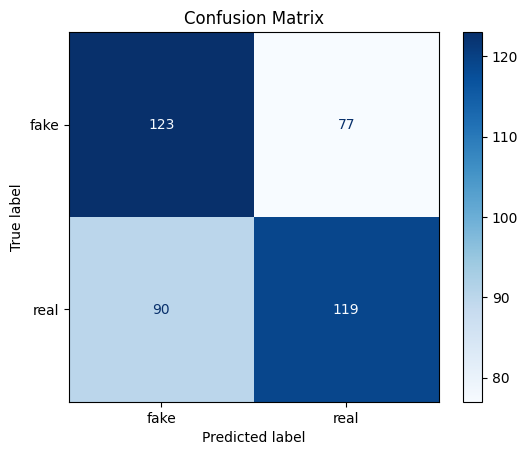

In [15]:
# Generate the confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title("Confusion Matrix")
plt.show()
